# ANALYSING THE SEATTLE AIRBnB DATA TO ANSWER BUSINESS QUESTIONS.

## CRISP-DM Process

### Business understanding: ###
The data might give us a better understanding into how rental prices and other features of a property interacts. three business questions we would attempt answering are:

- Is there a significant difference in the distribution of ammenities among properties with different price range?
- Is there a significant difference in ratings distribution pattern in respect to price?
- What features are the most positively related to the rental price of different properties?

### Data Understanding:
Seattle data has 3818 different listings and 92 different features.

### Data processing:
Each question would require different dat processing.

### Data Modeling:
Refer to data modeling.

### Evaluate results and deploy:
Link to medium publication https://medium.com/@adegokedaniel4/analysing-seattles-airbnb-data-4c46e0f68429

Link to github repository https://github.com/pacifier7/Udacity-term-2-machine-learning-projects

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df2 = pd.read_csv('./listings.csv')
df2.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,2.016010e+13,1/4/2016,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,2.016010e+13,1/4/2016,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,2.016010e+13,1/4/2016,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,2.016010e+13,1/4/2016,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,2.016010e+13,1/4/2016,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
df2.shape

(3818, 92)

# Preprocessing.

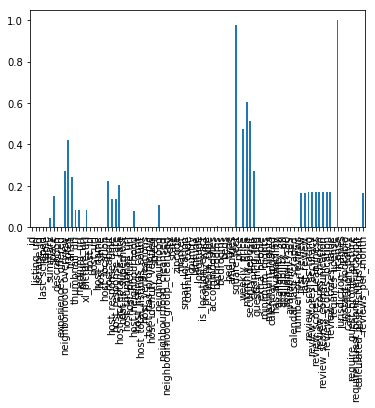

In [13]:
#plot graph of missing values
df2.isnull().mean().plot(kind='bar')

From the graph above, it can be seen that outlier columns have greater than 40% of their total data missing. 

In [6]:
# Remove columns with missing values greater than 40%
missing_grp=set(df2.columns[df2.isnull().mean()>0.4])
df1=df2.drop(missing_grp, axis=1)
df1.shape

(3818, 86)

 Drop columns that might be difficult to process into useful information in respect to our business 
 questions.

In [8]:
drop_list= ['id','listing_url','scrape_id','last_scraped','name','summary','space','description',
           'experiences_offered','neighborhood_overview','transit','medium_url','thumbnail_url','picture_url',
           'xl_picture_url','host_id','host_url','host_name','host_since','host_location','host_about',
           'host_acceptance_rate','host_thumbnail_url','host_picture_url','host_listings_count','host_verifications',
           'street','neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed','city','state','zipcode',
          'market','smart_location','country','country_code','latitude','longitude','cleaning_fee',
            'extra_people','calendar_updated','calendar_last_scraped','first_review','last_review',
           'jurisdiction_names','reviews_per_month']
df1=df1.drop(drop_list, axis=1)
df1.shape

(3818, 39)

The amenities column needs further processing. It would be converted to a list containing strings, and the possible amenities would also be collected in a list.

In [9]:
pos=[]
for i in range(df1.shape[0]):
    temp=[]
    df1.amenities.iloc[i] = df1.amenities.iloc[i].replace('"','')
    df1.amenities.iloc[i] = df1.amenities.iloc[i].replace('{','')
    df1.amenities.iloc[i] = df1.amenities.iloc[i].replace('}','')
    temp = df1.amenities.iloc[i].split(',')
    df1.amenities.iloc[i]=temp
    for i in temp:
        if i not in pos:
            pos.append(i)
            
pos
         

C:\Users\ADEGOKE DANIEL\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


['TV',
 'Cable TV',
 'Internet',
 'Wireless Internet',
 'Air Conditioning',
 'Kitchen',
 'Heating',
 'Family/Kid Friendly',
 'Washer',
 'Dryer',
 'Free Parking on Premises',
 'Buzzer/Wireless Intercom',
 'Smoke Detector',
 'Carbon Monoxide Detector',
 'First Aid Kit',
 'Safety Card',
 'Fire Extinguisher',
 'Essentials',
 'Pets Allowed',
 'Pets live on this property',
 'Dog(s)',
 'Cat(s)',
 'Hot Tub',
 'Indoor Fireplace',
 'Shampoo',
 'Breakfast',
 '24-Hour Check-in',
 'Hangers',
 'Hair Dryer',
 'Iron',
 'Laptop Friendly Workspace',
 'Suitable for Events',
 'Elevator in Building',
 'Lock on Bedroom Door',
 'Wheelchair Accessible',
 'Gym',
 '',
 'Pool',
 'Smoking Allowed',
 'Other pet(s)',
 'Doorman',
 'Washer / Dryer']

In [15]:
# The different types of amenities
amenities=['TV','Cable TV','Internet','Wireless Internet','Air Conditioning','Kitchen','Heating','Family/Kid Friendly',
 'Washer','Dryer','Free Parking on Premises','Buzzer/Wireless Intercom','Smoke Detector',
 'Carbon Monoxide Detector','First Aid Kit','Safety Card','Fire Extinguisher','Essentials','Pets Allowed',
 'Pets live on this property','Dog(s)','Cat(s)','Hot Tub','Indoor Fireplace','Shampoo','Breakfast',
 '24-Hour Check-in','Hangers','Hair Dryer','Iron','Laptop Friendly Workspace','Suitable for Events',
 'Elevator in Building','Lock on Bedroom Door','Wheelchair Accessible','Gym','Pool','Smoking Allowed',
 'Other pet(s)','Doorman','Washer / Dryer']
len(amenities)

41

The price column also needs to be converted to a numerical type.

In [10]:
df1.price = df1.price.apply(lambda x: float(x[1:].replace(',','')))
df1.price.max()

1000.0

  ## First business question: 
### Is there a significant difference in the distribution of ammenities among properties with different price range?
Firstly, I would divide the data into three portions; high price(601 to 1000 US dollars), medium price(301 to 600 US dollars) and low price (0 to 300 US dollars).



In [11]:
df1.low_price = np.where((0<df1.price)&(df1.price<=300),1,0)
df1_low = df1[df1.low_price==1]
df1_low.shape

(3659, 39)

In [12]:
df1.medium_price=np.where((301<df1.price)&(df1.price<=600),1,0)
df1_medium = df1[df1.medium_price==1]
df1_medium.shape

(145, 39)

In [13]:
df1.high_price=np.where((601<df1.price)&(df1.price<=1000),1,0)
df1_high = df1[df1.high_price==1]
df1_high.shape

(14, 39)

In [124]:
# Function to create plots of amenities distribution among different properties in reference to their price.

from collections import defaultdict
def amn_dist(div,group):
    '''Input: div:- the dataframe
            group:- Idenfication to be inserted in the title
        Output: Plot showing amenities distribution in the dataframe'''
    freq= defaultdict(int)
    for i in range(div.shape[0]):
        for e in amenities:
            if e in div.amenities.iloc[i]:
                freq[e]+=1
    for i in freq:
        freq[i]=freq[i]/div.shape[0]*100
    plt.bar(range(len(freq)), list(freq.values()), align='center')
    plt.xticks(range(len(freq)), list(freq.keys()), rotation='vertical')
    plt.title('amenities distribution for properties with prices in the range '+ group)
    plt.grid(b=True)
    frequency= freq
    visual=plt.show()
    return frequency, visual

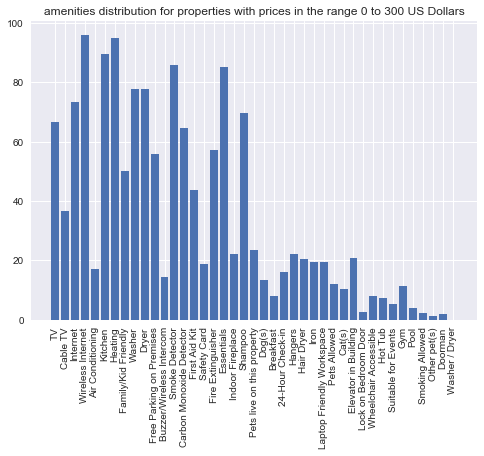

41

In [125]:
freq1,vis1=amn_dist(df1_low,'0 to 300 US Dollars')
len(freq1)

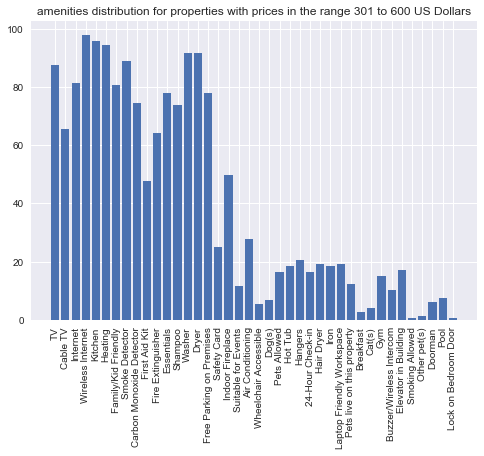

40

In [126]:
freq2,vis2=amn_dist(df1_medium,'301 to 600 US Dollars')
len(freq2)

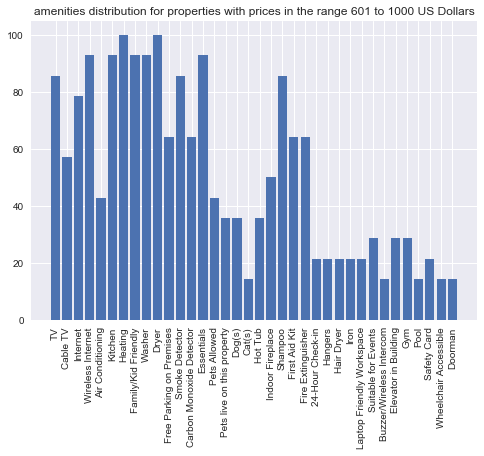

36

In [127]:
freq3,vis3=amn_dist(df1_high,'601 to 1000 US Dollars')
len(freq3)

## ANSWER TO FIRST QUESTION
### Is there a significant difference in the distribution of ammenities among properties with different price range?
### Inferences:
1 The higher the price, the lower the variety of amenities available as evidenced by; 
    - All variety of amenities are present in the low price range (41).
    - All vareity of amenities are present in the medium price range save one (40).
    - High price range has only 36 variety of the amenities.

2 However, (using 80% as a representing population from each group);
          - (wireless internet, kitchen, heating,smoke detector and essentials) are the only
          amenities  common to at least 80% of the low price population (12.2% of amenities in that 
          group).
          - (TV, Internet,wireless internet,kitchen, heating, family/kid friendly,smoke detector,
          washer and dryer) are the amenities  common to at least 80% of 
          the medium price population (22.5% of amenities in that 
          group).
          - (TV, wireless internet,kitchen, heating, family/kid friendly,smoke detector,
          washer, dryer,essentials and shampoo) are the amenities  common to at least 80% of 
          the high price population (27.7% of amenities in that 
          group).
          
This shows that even though the lower priced properties had a higher variety of amenities, the amenity coverage is lower that that of the other groups(with only 12% of the amenities being found in 80% or more of the population, while 22.5% of possible amenities are found in 80% or more of the medium price population and 27.7% of possible amenities are found in 80% or more of the high price population).

In [128]:
#df1_low.review_scores_rating.value_counts().plot(kind="bar")
def ratn_dis(div,group):
    '''Input: div:- the dataframe
            group:- Idenfication to be inserted in the title
        Output: Plot showing ratings distribution in the dataframe'''
    div.review_scores_rating.value_counts().plot(kind="bar",figsize=(8,4),grid = True,title='Rating distribution among '+group)


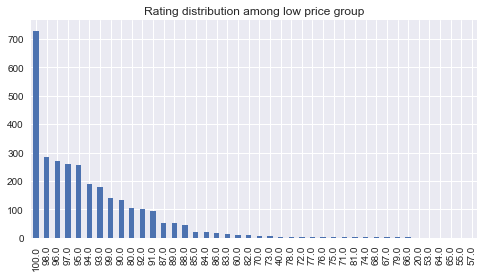

In [129]:
ratn_dis(df1_low,'low price group')

In [130]:
df1_low.review_scores_rating.min()

20.0

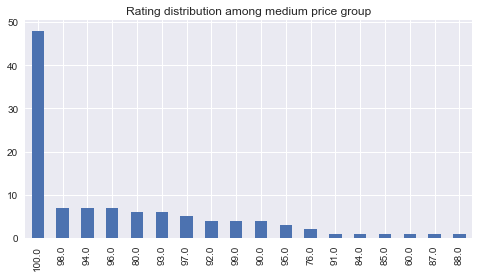

In [131]:
ratn_dis(df1_medium,'medium price group')

In [65]:
df1_medium.review_scores_rating.min()

60.0

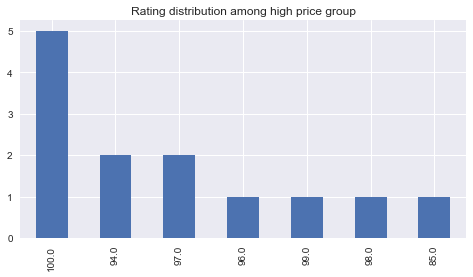

In [132]:
ratn_dis(df1_high,'high price group')

In [66]:
df1_high.review_scores_rating.min()

85.0

# ANSWER TO 2ND QUESTION
### Is there a significant difference in ratings distribution patterns in respect to price?
The three price groups show similar rating distribution with majority getting a rating of 100% and then rating decreases from that point downwards.
However,

The rating's range for:

-the low price group is 80 (max=100, min = 20).

-the medium price group is 40 (max=100, min = 60).

-the high price group is 15 (max=100, min = 85).

It could be infered that the higher the price, the more likely for the rating to be high and vice-versa.

# 3rd question
### What features are the most positively related to the rental price of different properties?

In [68]:
df1.columns

Index(['host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'price', 'guests_included',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'requires_license',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count'],
      dtype='object')

In [69]:
df1.dtypes

host_response_time                   object
host_response_rate                   object
host_is_superhost                    object
host_neighbourhood                   object
host_total_listings_count           float64
host_has_profile_pic                 object
host_identity_verified               object
is_location_exact                    object
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
bed_type                             object
amenities                            object
price                               float64
guests_included                       int64
minimum_nights                        int64
maximum_nights                        int64
has_availability                     object
availability_30                       int64
availability_60                 

In [18]:
df2.requires_license.value_counts()

f    3818
Name: requires_license, dtype: int64

In [70]:
#categorical variable holds a list of columns that would be further processed by making dummy variables.
categorical =['host_response_time','host_is_superhost','host_has_profile_pic','host_identity_verified',
             'is_location_exact','property_type','room_type','bed_type','has_availability','instant_bookable',
             'cancellation_policy','require_guest_profile_picture','require_guest_phone_verification',
             ]
#variables of numerical type.
numerical=['accommodates','host_total_listings_count','bathrooms','bedrooms','beds','guests_included',
         'minimum_nights','maximum_nights','availability_30','availability_60','availability_90',
         'availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
         'review_scores_checkin','review_scores_communication','review_scores_location',
         'review_scores_value','calculated_host_listings_count','host_response_rate','price']
#The host_neighbourhood column would be dropped because it has too many variables (102) that are not well distributed among the listings
#The 'requires_license' column would be dropped because all of it values are false and this would not contribute to modeling
#The amenities column would be dropped following its conversion to a numerical variable that represent the amount of amenities a listing has
remove = ['host_neighbourhood','requires_license','amenities']


In [73]:
#converting the host response rate to float type
for i in range(df1.shape[0]):
    if type(df1.host_response_rate.iloc[i])==str:
        df1.host_response_rate.iloc[i]=float(df1.host_response_rate.iloc[i][0:-1])

C:\Users\ADEGOKE DANIEL\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [77]:
#create a new column that contains the number of amenities and then drop the amenities column
df1.amenities_count = df1.amenities.apply(lambda x: len(x))
df1=df1.drop(remove, axis=1)

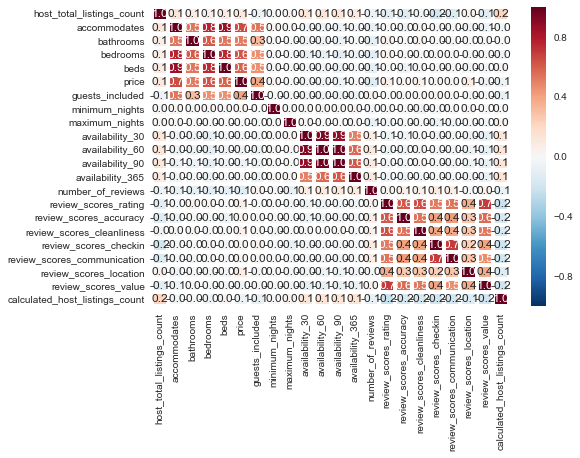

In [133]:
import seaborn as sns
sns.heatmap(df1.corr(),annot=True,fmt='.1f',linewidths =3)

In [78]:
len(df1.columns)

36

In [79]:
# function to convert categorical variables to dummy variables
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [119]:
# convert categorical variables to dummy variables
df_new = create_dummy_df(df1, categorical, dummy_na=False) #Use your newly created function
#I am dropping the null values in order to ensure scaling works 
drop_df=df_new.dropna(axis=0)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
drop_df[numerical]= min_max_scaler.fit_transform(drop_df[numerical])

C:\Users\ADEGOKE DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ADEGOKE DANIEL\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [122]:
# create the x and y variables for predictions
X=drop_df.drop(['price'],axis=1)
y=drop_df['price']

# Training

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state=42) 

lm_model = LinearRegression() # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the {} was {} on {} values.".format('linear regression model',r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the linear regression model was 0.5558167044319333 on 1134 values.'

Using the heatmap: the most positively correlated features in respect to the rental price are:

-host total listing count feature: 0.1

-Number of people a property could accomodate:0.7

-number of bathrooms:0.5

-number of bedrooms:0.6

-number of beds:0.6

-if guests are included.:0.4

-review scores rating: 0.1

-revew scores cleanliness: 0.1

-review score location: 0.1

Meaning the more expensive rentals have higher values in all this features.

The r-squared error usin g linear regression model is 0.556